6) creditcard

In [1]:
# 원본 데이터셋 출처

# https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets/data

# 2013년 9월 유럽 카드 소지자가 신용카드로 거래한 내용, 284807건의 거래 가운데 492건의 사기거래

# 변수 v1~v28, Amount 거래 금액, Class 0/1 정상거래/사기거래

import pandas as pd

# 신용카드 거래 데이터 csv 파일을 로딩(원본)

df = pd.read_csv("c:/workspace/data/creditcard/creditcard.csv")

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0.5, 1.0, '분류\n (0: 정상거래, 1: 사기거래)')

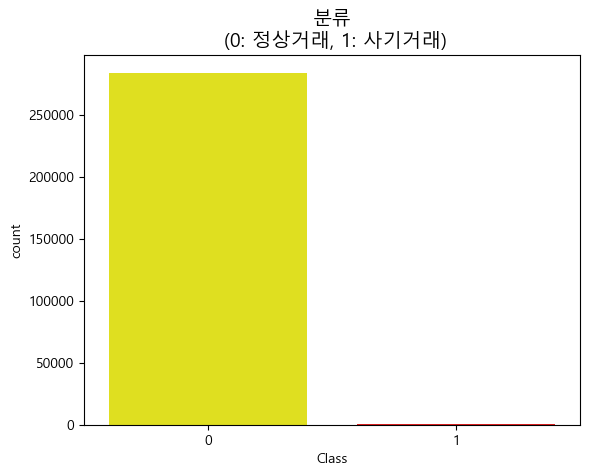

In [2]:
import seaborn as sns

import matplotlib.pyplot as plt

#한글 처리를 위해 폰트 설정

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)

colors = ["yellow", "red"]

sns.countplot(x='Class', data=df, palette=colors)

plt.title('분류\n (0: 정상거래, 1: 사기거래)', fontsize=14)

#불균형 데이터셋

In [3]:
print("사기거래")

print(df.Amount[df.Class == 1].describe())

print()

print("정상거래")

print(df.Amount[df.Class == 0].describe())

# 사기거래 492건, 정상거래 284315건

사기거래
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

정상거래
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [4]:
train_cols = df.columns[1:30]

print(train_cols)

X = df[train_cols] # 독립변수

y = df["Class"]

print(df[train_cols].head())

print(y.head())

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  

In [5]:
#언더샘플링

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=train_cols )

y_samp = pd.DataFrame(data=y_sample,columns=['Class'])

df2=pd.concat([X_samp,y_samp],axis=1)

df2["Class"].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [6]:
X = X_samp[train_cols] # 독립변수

y = y_samp["Class"]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=10)

In [8]:
from keras.models import Sequential

from keras.layers import Dense, Dropout



# 분류 모델 구현 함수

def make_model(input_number, hidden_layers, output_number):

    #모델 초기화

    model = Sequential(name='model1')

    model.add(Dense(hidden_layers[0], activation="relu",

                           input_shape=(input_number,)))

    model.add(Dense(hidden_layers[1], activation="relu"))  

    model.add(Dense(hidden_layers[2], activation="relu"))     

    #드롭아웃 계층 Dropout(p) p라는 확률로 출력 노드의 신호를 off, 신호를 전달하지 않음, 과적합 방지

    #지정한 비율만큼 랜덤으로 출력을 off 시켜서 과적합을 방지하기 위한 기법(앙상블 학습의 효과도 얻을 수 있음)

    model.add(Dropout(0.2, name='Dropout'))

    #출력층

    model.add(Dense(output_number, activation="sigmoid", name='Output'))

    model.compile(loss="mse",

                     optimizer="adam",

                     metrics=["accuracy"])

    return model    

In [9]:
model = make_model(len(X_train.columns), [128,64,32], 1)

In [10]:
model.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3840      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 Dropout (Dropout)           (None, 32)                0         
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 14,209
Trainable params: 14,209
Non-trainable params: 0
_________________________________________________________________


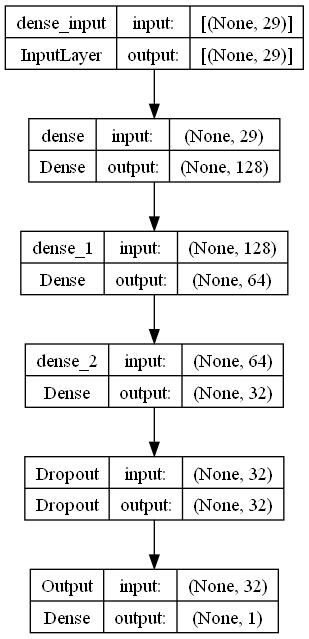

In [11]:
from keras.utils import plot_model  

plot_model(model,show_shapes=True)

In [12]:
X_train_scaled=X_train

X_test_scaled=X_test

In [13]:
from datetime import datetime  

import tensorflow as tf  

logdir="c:/logs/" + datetime.now().strftime("%Y%m%d-%H%M%S") 

logdir

'c:/logs/20230719-154816'

In [14]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)  

hist = model.fit(X_train_scaled, y_train, epochs=50,callbacks=[tensorboard_callback])

#anaconda prompt에서 실행

#tensorboard --logdir=로그파일경로

Epoch 1/50
25/25 [==============================] - 1s 9ms/step - loss: 0.2300 - accuracy: 0.7052
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.1446 - accuracy: 0.8424
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.1352 - accuracy: 0.8577
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.1069 - accuracy: 0.8856
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0674 - accuracy: 0.9288
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0760 - accuracy: 0.9123
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0636 - accuracy: 0.9352
Epoch 8/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0928 - accuracy: 0.8907
Epoch 9/50
25/25 [==============================] - 0s 4ms/step - loss: 0.1261 - accuracy: 0.8666
Epoch 10/50
25/25 [==============================] - 0s 5ms/step - loss: 0.0969 - accuracy: 0.8996
Epoch 11/50
25/25 [

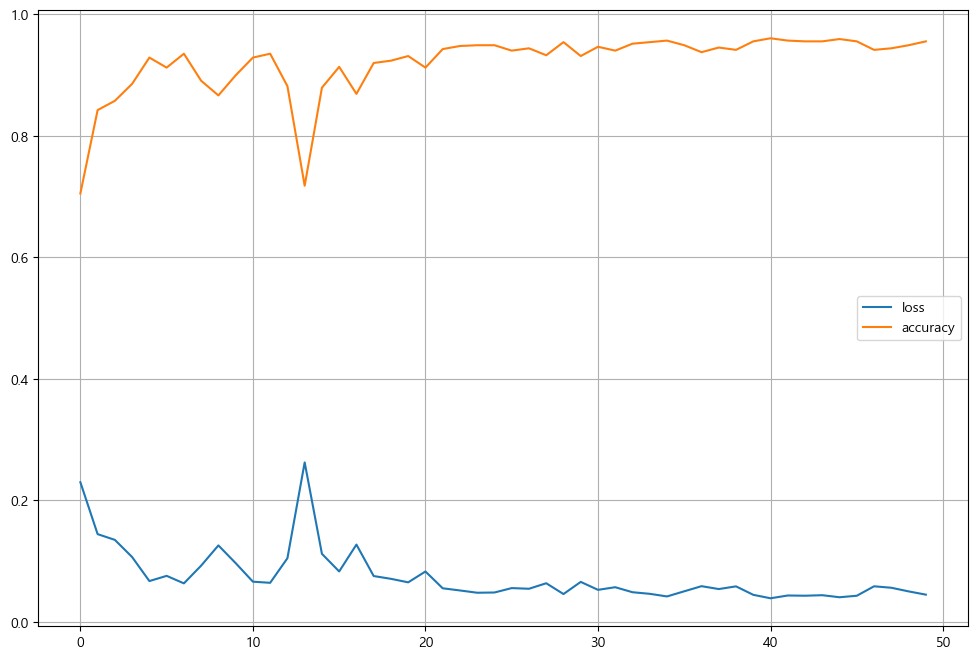

In [15]:
# 모델 학습 과정 표시

plt.figure(figsize=(12,8))

plt.plot(hist.history['loss']) #손실률

plt.plot(hist.history['accuracy']) #정확도

plt.legend(['loss','accuracy'])

plt.grid()

plt.show()

In [16]:
# 모델 평가

scores = model.evaluate(X_train_scaled, y_train, verbose=1)

print(scores)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #학습용

25/25 [==============================] - 0s 4ms/step - loss: 0.0462 - accuracy: 0.9530
[0.04616737738251686, 0.9529860019683838]
accuracy: 95.30%


In [17]:
scores = model.evaluate(X_test_scaled, y_test, verbose=1)

print(scores)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #검증용

7/7 [==============================] - 0s 12ms/step - loss: 0.1114 - accuracy: 0.8832
[0.11135438084602356, 0.8832487463951111]
accuracy: 88.32%


In [18]:
import numpy as np

pred=model.predict(X_test)

print(np.round(pred[:5]))

7/7 [==============================] - 0s 2ms/step
[[1.]
 [0.]
 [1.]
 [0.]
 [1.]]


In [ ]:
model.save('c:/workspace/data/creditcard/creditcard.h5')

#netron으로 확인